In [179]:
import cv2
import fiftyone as fo
from sahi import AutoDetectionModel
from sahi.predict import get_prediction, get_sliced_prediction, predict

dataset = fo.load_dataset("copy_pipeline_data")

In [2]:
copy = dataset.clone()

In [3]:
yolov8_model_path = "Pipeline_models/Best_version_2.pt"

In [4]:
sahi_model = AutoDetectionModel.from_pretrained(
    model_type='yolov8',
    model_path=yolov8_model_path,
    confidence_threshold=0.3,
    device="cuda:0",
)

In [142]:
# samples = copy.take(500)

In [5]:

for sample in copy:
    
    result = get_sliced_prediction(
        sample.filepath,
        sahi_model,
        slice_height = 1280,
        slice_width = 1280,
        overlap_height_ratio = 0.2,
        overlap_width_ratio = 0.2
    )

    fiftyone_detections = result.to_fiftyone_detections()
    
    sample["sahi_predictions_v2_1280x1280"] = fo.Detections(detections=fiftyone_detections)
    sample.save()
  



Performing prediction on 24 number of slices.
Performing prediction on 24 number of slices.
Performing prediction on 24 number of slices.
Performing prediction on 24 number of slices.
Performing prediction on 24 number of slices.
Performing prediction on 24 number of slices.
Performing prediction on 24 number of slices.
Performing prediction on 24 number of slices.
Performing prediction on 24 number of slices.
Performing prediction on 24 number of slices.
Performing prediction on 24 number of slices.
Performing prediction on 24 number of slices.
Performing prediction on 24 number of slices.
Performing prediction on 24 number of slices.
Performing prediction on 24 number of slices.
Performing prediction on 24 number of slices.
Performing prediction on 24 number of slices.
Performing prediction on 24 number of slices.
Performing prediction on 24 number of slices.
Performing prediction on 24 number of slices.
Performing prediction on 24 number of slices.
Performing prediction on 24 number

In [6]:

for sample in copy:
    
    result = get_sliced_prediction(
        sample.filepath,
        sahi_model,
        slice_height = 320,
        slice_width = 320,
        overlap_height_ratio = 0.2,
        overlap_width_ratio = 0.2
    )

    fiftyone_detections = result.to_fiftyone_detections()
    
    sample["sahi_predictions_v2_320x320"] = fo.Detections(detections=fiftyone_detections)
    sample.save()
  



Performing prediction on 384 number of slices.
Performing prediction on 384 number of slices.
Performing prediction on 384 number of slices.
Performing prediction on 384 number of slices.
Performing prediction on 384 number of slices.
Performing prediction on 384 number of slices.
Performing prediction on 384 number of slices.
Performing prediction on 384 number of slices.
Performing prediction on 384 number of slices.
Performing prediction on 384 number of slices.
Performing prediction on 384 number of slices.
Performing prediction on 384 number of slices.
Performing prediction on 384 number of slices.
Performing prediction on 384 number of slices.
Performing prediction on 384 number of slices.
Performing prediction on 384 number of slices.
Performing prediction on 384 number of slices.
Performing prediction on 384 number of slices.
Performing prediction on 384 number of slices.
Performing prediction on 384 number of slices.
Performing prediction on 384 number of slices.
Performing pr

KeyboardInterrupt: 

In [143]:
dataset = fo.load_dataset("copy_pipeline_data")


In [ ]:
copy = dataset.clone()

In [130]:
import fiftyone as fo

# Iterate over the samples in the dataset and update the labels
for sample in copy:
    for i in range(0,len(sample.sahi_predictions_v2_1280x1280.detections)):
        print(sample.sahi_predictions_v2_1280x1280.detections[i].label)
        
    # Check if the label is "ELECTRIC POLES"
        if sample.sahi_predictions_v2_1280x1280.detections[i].label == "PERMENANT STRUCTURES":
        # Update the label to "ELECTRIC_POLES"
            sample.sahi_predictions_v2_1280x1280.detections[i].label = "PERMENANT_STRUCTURES"
            print(sample.sahi_predictions_v2_1280x1280.detections[i].label)
# Save the updated dataset
        sample.save()
    break


ELECTRIC_POLES
ELECTRIC_POLES
TREES
TREES
TREES
TREES
TREES
TREES
TREES
TREES
TREES
TREES
TREES
TREES
TREES
TREES
TREES
TREES
TREES
TREES
TREES
TEMPORARY STRUCTURES
TEMPORARY STRUCTURES
PERMENANT_STRUCTURES
PERMENANT_STRUCTURES
PERMENANT_STRUCTURES
PERMENANT_STRUCTURES


In [169]:
import fiftyone as fo

# Iterate over the samples in the dataset and update the labels
for sample in dataset:
    for i in range(0,len(sample.sahi_predictions_v2_640x640.detections)):
    # Check if the label is "ELECTRIC POLES"
        if sample.sahi_predictions_v2_640x640.detections[i].c_4_iou == False:
        # Update the label to "ELECTRIC_POLES"
            sample.sahi_predictions_v2_640x640.detections[i].label = "ELECTRIC_POLES"

# Save the updated dataset
        sample.save()


AttributeError: 'Detection' object has no attribute 'c_4_iou'

In [180]:
session = fo.launch_app(dataset)

In [60]:
dataset.list_evaluations()

['c_0', 'c_1', 'c_2', 'c_3', 'c_4', 'compute_1', 'compute_2', 'eval']

In [50]:
dataset

Name:        copy_pipeline_data
Media type:  image
Num samples: 11369
Persistent:  True
Tags:        []
Sample fields:
    id:                            fiftyone.core.fields.ObjectIdField
    filepath:                      fiftyone.core.fields.StringField
    tags:                          fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:                      fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth:                  fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    created_date:                  fiftyone.core.fields.DateField
    predictions_yolov8_v1:         fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    mistakenness:                  fiftyone.core.fields.FloatField
    possible_missing:              fiftyone.core.fields.IntField
    possible_spurious:             fiftyone.core.fields.IntField
    eval_tp:                       fiftyon

In [164]:
results_7 = dataset.evaluate_detections(
    "sahi_predictions_v2_1280x1280",
    gt_field="sahi_predictions_v3_640x640",
    eval_key="c_7",
    compute_mAP=True,
    classwise=False
)

Evaluating detections...


04/03/2024 11:13:50 - INFO - fiftyone.utils.eval.detection -   Evaluating detections...


 100% |█████████████| 11369/11369 [6.0m elapsed, 0s remaining, 43.8 samples/s]       


04/03/2024 11:19:47 - INFO - eta.core.utils -    100% |█████████████| 11369/11369 [6.0m elapsed, 0s remaining, 43.8 samples/s]       


Performing IoU sweep...


04/03/2024 11:19:47 - INFO - fiftyone.utils.eval.coco -   Performing IoU sweep...


 100% |█████████████| 11369/11369 [3.8m elapsed, 0s remaining, 55.9 samples/s]      


04/03/2024 11:23:38 - INFO - eta.core.utils -    100% |█████████████| 11369/11369 [3.8m elapsed, 0s remaining, 55.9 samples/s]      


In [163]:
results_6 = dataset.evaluate_detections(
    "sahi_predictions_v3_640x640",
    gt_field="sahi_predictions_v2_1280x1280",
    eval_key="c_6",
    compute_mAP=True,
    classwise=False
)

Evaluating detections...


04/03/2024 11:04:35 - INFO - fiftyone.utils.eval.detection -   Evaluating detections...


 100% |█████████████| 11369/11369 [5.6m elapsed, 0s remaining, 47.0 samples/s]       


04/03/2024 11:10:08 - INFO - eta.core.utils -    100% |█████████████| 11369/11369 [5.6m elapsed, 0s remaining, 47.0 samples/s]       


Performing IoU sweep...


04/03/2024 11:10:08 - INFO - fiftyone.utils.eval.coco -   Performing IoU sweep...


 100% |█████████████| 11369/11369 [3.6m elapsed, 0s remaining, 57.7 samples/s]      


04/03/2024 11:13:47 - INFO - eta.core.utils -    100% |█████████████| 11369/11369 [3.6m elapsed, 0s remaining, 57.7 samples/s]      


In [160]:
results_5 = dataset.evaluate_detections(
    "sahi_predictions_v3_640x640",
    gt_field="ground_truth",
    eval_key="c_5",
    compute_mAP=True,
    classwise=False
)

Evaluating detections...


04/03/2024 10:54:47 - INFO - fiftyone.utils.eval.detection -   Evaluating detections...


 100% |█████████████| 11369/11369 [3.5m elapsed, 0s remaining, 53.5 samples/s]      


04/03/2024 10:58:20 - INFO - eta.core.utils -    100% |█████████████| 11369/11369 [3.5m elapsed, 0s remaining, 53.5 samples/s]      


Performing IoU sweep...


04/03/2024 10:58:20 - INFO - fiftyone.utils.eval.coco -   Performing IoU sweep...


 100% |█████████████| 11369/11369 [2.4m elapsed, 0s remaining, 66.7 samples/s]       


04/03/2024 11:00:46 - INFO - eta.core.utils -    100% |█████████████| 11369/11369 [2.4m elapsed, 0s remaining, 66.7 samples/s]       


In [178]:
results_8 = dataset.evaluate_detections(
    "ground_truth",
    gt_field="sahi_predictions_v3_640x640",
    eval_key="c_8",
    compute_mAP=True,
    classwise=False
)

Evaluating detections...


04/04/2024 16:00:22 - INFO - fiftyone.utils.eval.detection -   Evaluating detections...


 100% |█████████████| 11369/11369 [4.3m elapsed, 0s remaining, 42.2 samples/s]       


04/04/2024 16:04:41 - INFO - eta.core.utils -    100% |█████████████| 11369/11369 [4.3m elapsed, 0s remaining, 42.2 samples/s]       


Performing IoU sweep...


04/04/2024 16:04:41 - INFO - fiftyone.utils.eval.coco -   Performing IoU sweep...


 100% |█████████████| 11369/11369 [2.9m elapsed, 0s remaining, 57.5 samples/s]      


04/04/2024 16:07:35 - INFO - eta.core.utils -    100% |█████████████| 11369/11369 [2.9m elapsed, 0s remaining, 57.5 samples/s]      


In [63]:
results_0 = dataset.evaluate_detections(
    "sahi_predictions_v2_640x640",
    gt_field="ground_truth",
    eval_key="c_0",
    compute_mAP=True,
    classwise=False
)

Evaluating detections...


03/28/2024 10:38:16 - INFO - fiftyone.utils.eval.detection -   Evaluating detections...


 100% |█████████████| 11369/11369 [7.3m elapsed, 0s remaining, 50.1 samples/s]       


03/28/2024 10:45:32 - INFO - eta.core.utils -    100% |█████████████| 11369/11369 [7.3m elapsed, 0s remaining, 50.1 samples/s]       


Performing IoU sweep...


03/28/2024 10:45:32 - INFO - fiftyone.utils.eval.coco -   Performing IoU sweep...


 100% |█████████████| 11369/11369 [2.8m elapsed, 0s remaining, 60.5 samples/s]       


03/28/2024 10:48:21 - INFO - eta.core.utils -    100% |█████████████| 11369/11369 [2.8m elapsed, 0s remaining, 60.5 samples/s]       


In [20]:
results_1 = dataset.load_evaluation_results("c_1")

In [15]:
# results_1 = dataset.evaluate_detections(
#     "sahi_predictions_v2_1280x1280",
#     gt_field="ground_truth",
#     eval_key="c_1",
#     compute_mAP=True,
#     classwise=False
# )

Evaluating detections...


03/26/2024 11:15:39 - INFO - fiftyone.utils.eval.detection -   Evaluating detections...


 100% |█████████████| 11369/11369 [3.8m elapsed, 0s remaining, 53.3 samples/s]       


03/26/2024 11:19:25 - INFO - eta.core.utils -    100% |█████████████| 11369/11369 [3.8m elapsed, 0s remaining, 53.3 samples/s]       


Performing IoU sweep...


03/26/2024 11:19:25 - INFO - fiftyone.utils.eval.coco -   Performing IoU sweep...


 100% |█████████████| 11369/11369 [2.4m elapsed, 0s remaining, 68.9 samples/s]       


03/26/2024 11:21:52 - INFO - eta.core.utils -    100% |█████████████| 11369/11369 [2.4m elapsed, 0s remaining, 68.9 samples/s]       


In [157]:
results_5 = dataset.evaluate_detections(
    "ground_truth",
    gt_field="sahi_predictions_v2_1280x1280",
    eval_key="c_1_rev",
    compute_mAP=True,
    classwise=False
)

Evaluating detections...


04/02/2024 13:33:31 - INFO - fiftyone.utils.eval.detection -   Evaluating detections...


 100% |█████████████| 11369/11369 [4.9m elapsed, 0s remaining, 44.4 samples/s]      


04/02/2024 13:38:27 - INFO - eta.core.utils -    100% |█████████████| 11369/11369 [4.9m elapsed, 0s remaining, 44.4 samples/s]      


Performing IoU sweep...


04/02/2024 13:38:27 - INFO - fiftyone.utils.eval.coco -   Performing IoU sweep...


 100% |█████████████| 11369/11369 [3.1m elapsed, 0s remaining, 55.8 samples/s]      


04/02/2024 13:41:34 - INFO - eta.core.utils -    100% |█████████████| 11369/11369 [3.1m elapsed, 0s remaining, 55.8 samples/s]      


In [21]:
results_2 = dataset.load_evaluation_results("c_2")

In [152]:
# results_2 = dataset.evaluate_detections(
#     "sahi_predictions_v2_320x320",
#     gt_field="ground_truth",
#     eval_key="c_2",
#     compute_mAP=True,
#     classwise=False
# )

Evaluating detections...


03/21/2024 23:10:50 - INFO - fiftyone.utils.eval.detection -   Evaluating detections...


 100% |█████████████| 11369/11369 [17.7m elapsed, 0s remaining, 0.5 samples/s]      


03/21/2024 23:28:32 - INFO - eta.core.utils -    100% |█████████████| 11369/11369 [17.7m elapsed, 0s remaining, 0.5 samples/s]      


Performing IoU sweep...


03/21/2024 23:28:32 - INFO - fiftyone.utils.eval.coco -   Performing IoU sweep...


 100% |█████████████| 11369/11369 [3.8m elapsed, 0s remaining, 16.2 samples/s]       


03/21/2024 23:32:20 - INFO - eta.core.utils -    100% |█████████████| 11369/11369 [3.8m elapsed, 0s remaining, 16.2 samples/s]       


In [29]:
results_3 = dataset.evaluate_detections(
    "sahi_predictions_v2_320x320",
    gt_field="sahi_predictions_v2_1280x1280",
    eval_key="c_3",
    compute_mAP=True,
    classwise=False
)

Evaluating detections...


03/26/2024 15:05:57 - INFO - fiftyone.utils.eval.detection -   Evaluating detections...


 100% |█████████████| 11369/11369 [20.1m elapsed, 0s remaining, 0.5 samples/s]      


03/26/2024 15:26:05 - INFO - eta.core.utils -    100% |█████████████| 11369/11369 [20.1m elapsed, 0s remaining, 0.5 samples/s]      


Performing IoU sweep...


03/26/2024 15:26:05 - INFO - fiftyone.utils.eval.coco -   Performing IoU sweep...


 100% |█████████████| 11369/11369 [5.4m elapsed, 0s remaining, 12.0 samples/s]      


03/26/2024 15:31:27 - INFO - eta.core.utils -    100% |█████████████| 11369/11369 [5.4m elapsed, 0s remaining, 12.0 samples/s]      


In [43]:
results_4 = dataset.evaluate_detections(
    "sahi_predictions_v2_1280x1280",
    gt_field="sahi_predictions_v2_320x320",
    eval_key="c_4",
    compute_mAP=True,
    classwise=False
)

Evaluating detections...


03/27/2024 10:26:41 - INFO - fiftyone.utils.eval.detection -   Evaluating detections...


 100% |█████████████| 11369/11369 [22.7m elapsed, 0s remaining, 0.4 samples/s]      


03/27/2024 10:49:22 - INFO - eta.core.utils -    100% |█████████████| 11369/11369 [22.7m elapsed, 0s remaining, 0.4 samples/s]      


Performing IoU sweep...


03/27/2024 10:49:22 - INFO - fiftyone.utils.eval.coco -   Performing IoU sweep...


 100% |█████████████| 11369/11369 [6.2m elapsed, 0s remaining, 7.2 samples/s]       


03/27/2024 10:55:35 - INFO - eta.core.utils -    100% |█████████████| 11369/11369 [6.2m elapsed, 0s remaining, 7.2 samples/s]       


In [64]:
counts = dataset.count_values("ground_truth.detections.label")
classes = sorted(counts, key=counts.get, reverse=True)[:10]

results_0.print_report(classes=classes)

                      precision    recall  f1-score   support

               TREES       0.13      0.48      0.21     40885
      ELECTRIC_POLES       0.33      0.33      0.33     13952
PERMENANT_STRUCTURES       0.17      0.34      0.23     12029
TEMPORARY_STRUCTURES       0.14      0.31      0.19      4837
               PYLON       0.29      0.31      0.30      3173
                WELL       0.12      0.29      0.17      3033
               SOLAR       0.34      0.31      0.33       373
              MARKER       0.00      0.00      0.00       236
                 TLP       0.12      0.02      0.03       123
               ROADS       0.00      0.00      0.00        53

           micro avg       0.15      0.40      0.22     78694
           macro avg       0.16      0.24      0.18     78694
        weighted avg       0.18      0.40      0.23     78694



In [22]:
counts = dataset.count_values("ground_truth.detections.label")
classes = sorted(counts, key=counts.get, reverse=True)[:10]

results_1.print_report(classes=classes)

                      precision    recall  f1-score   support

               TREES       0.22      0.48      0.30     40885
      ELECTRIC_POLES       0.26      0.33      0.29     13952
PERMENANT_STRUCTURES       0.17      0.34      0.23     12029
TEMPORARY_STRUCTURES       0.12      0.29      0.17      4837
               PYLON       0.20      0.31      0.25      3173
                WELL       0.13      0.29      0.18      3033
               SOLAR       0.33      0.31      0.32       373
              MARKER       0.00      0.00      0.00       236
                 TLP       0.06      0.02      0.03       123
               ROADS       0.00      0.00      0.00        53

           micro avg       0.21      0.40      0.27     78694
           macro avg       0.15      0.24      0.18     78694
        weighted avg       0.21      0.40      0.27     78694



In [23]:
counts = dataset.count_values("ground_truth.detections.label")
classes = sorted(counts, key=counts.get, reverse=True)[:10]

results_2.print_report(classes=classes)

                      precision    recall  f1-score   support

               TREES       0.07      0.48      0.12     40885
      ELECTRIC_POLES       0.34      0.33      0.33     13952
PERMENANT_STRUCTURES       0.26      0.34      0.30     12029
TEMPORARY_STRUCTURES       0.20      0.32      0.25      4837
               PYLON       0.29      0.31      0.30      3173
                WELL       0.14      0.29      0.19      3033
               SOLAR       0.34      0.32      0.33       373
              MARKER       0.00      0.00      0.00       236
                 TLP       0.13      0.02      0.03       123
               ROADS       0.00      0.00      0.00        53

           micro avg       0.09      0.40      0.15     78694
           macro avg       0.18      0.24      0.18     78694
        weighted avg       0.17      0.40      0.20     78694



In [65]:
counts = dataset.count_values("ground_truth.detections.label")
classes = sorted(counts, key=counts.get, reverse=True)[:10]

results_3.print_report(classes=classes)

                      precision    recall  f1-score   support

               TREES       0.16      0.52      0.24     88929
      ELECTRIC_POLES       1.00      0.77      0.87     17743
PERMENANT_STRUCTURES       0.92      0.59      0.72     23908
TEMPORARY_STRUCTURES       0.73      0.47      0.57     11806
               PYLON       1.00      0.70      0.83      4746
                WELL       0.64      0.62      0.63      6539
               SOLAR       0.99      0.98      0.99       351
              MARKER       0.00      0.00      0.00         0
                 TLP       1.00      0.48      0.65        31
               ROADS       0.00      0.00      0.00         0

           micro avg       0.26      0.57      0.36    154053
           macro avg       0.64      0.51      0.55    154053
        weighted avg       0.47      0.57      0.45    154053



In [66]:
counts = dataset.count_values("ground_truth.detections.label")
classes = sorted(counts, key=counts.get, reverse=True)[:10]

results_4.print_report(classes=classes)

                      precision    recall  f1-score   support

               TREES       0.52      0.16      0.24    288210
      ELECTRIC_POLES       0.77      1.00      0.87     13627
PERMENANT_STRUCTURES       0.59      0.91      0.72     15500
TEMPORARY_STRUCTURES       0.42      0.65      0.51      7658
               PYLON       0.70      1.00      0.83      3340
                WELL       0.62      0.64      0.63      6364
               SOLAR       0.92      0.94      0.93       345
              MARKER       0.00      0.00      0.00         0
                 TLP       0.45      0.93      0.61        15
               ROADS       0.00      0.00      0.00         0

           micro avg       0.56      0.26      0.35    335059
           macro avg       0.50      0.62      0.53    335059
        weighted avg       0.53      0.26      0.31    335059



In [161]:
counts = dataset.count_values("ground_truth.detections.label")
classes = sorted(counts, key=counts.get, reverse=True)[:10]

results_5.print_report(classes=classes)

                      precision    recall  f1-score   support

               TREES       0.26      0.35      0.30     40885
      ELECTRIC_POLES       0.26      0.27      0.26     13952
PERMENANT_STRUCTURES       0.06      0.26      0.10     12029
TEMPORARY_STRUCTURES       0.11      0.17      0.14      4837
               PYLON       0.06      0.29      0.10      3173
                WELL       0.22      0.26      0.24      3033
               SOLAR       0.05      0.27      0.09       373
              MARKER       0.00      0.00      0.00       236
                 TLP       0.20      0.01      0.02       123
               ROADS       0.00      0.00      0.00        53

           micro avg       0.16      0.31      0.21     78694
           macro avg       0.12      0.19      0.12     78694
        weighted avg       0.21      0.31      0.24     78694



In [73]:
plot1 = results_0.plot_confusion_matrix(classes=classes)
plot1.show()

session.plots.attach(plot1)

FigureWidget({
    'data': [{'mode': 'markers',
              'opacity': 0.1,
              'type': 'scatter',
              'uid': 'e945bd9a-89f6-4781-83de-48765067d6e3',
              'x': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,
                           6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
                           0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,
                           6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
                           0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,
                           6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
                           0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,
                           6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
              'y': array([ 0,  0,  0,  0, 

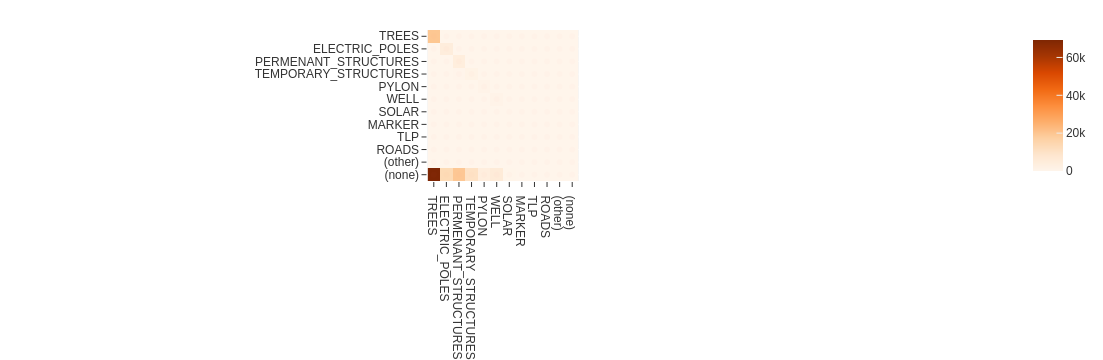

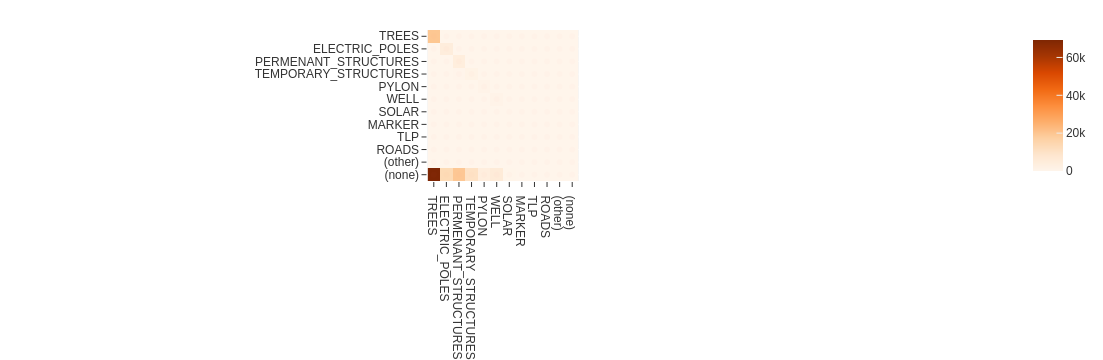

FigureWidget({
    'data': [{'mode': 'markers',
              'opacity': 0.1,
              'type': 'scatter',
              'uid': 'd20d01a5-69f8-456d-a4b6-24ed10b5523d',
              'x': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,
                           6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
                           0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,
                           6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
                           0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,
                           6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
                           0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,
                           6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
              'y': array([ 0,  0,  0,  0, 

In [68]:
plot1 = results_1.plot_confusion_matrix(classes=classes)
plot1.show()

session.plots.attach(plot1)

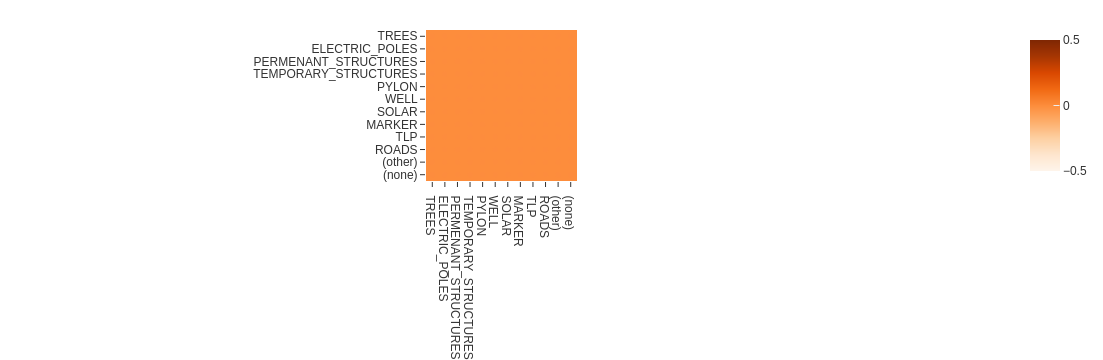

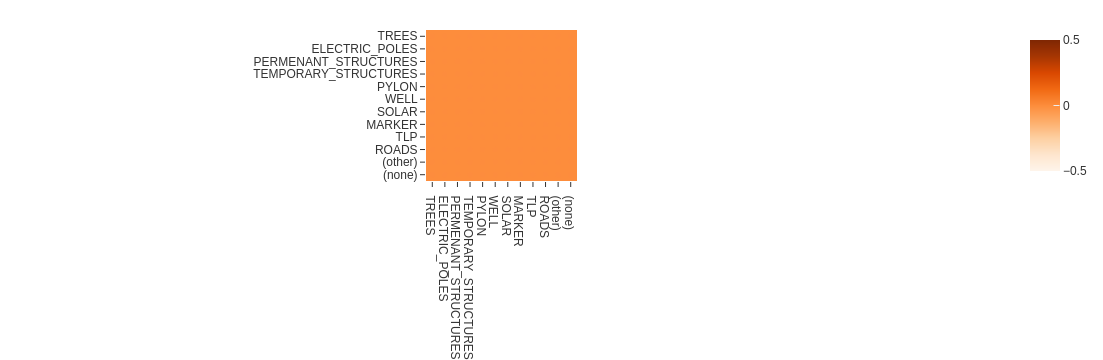

FigureWidget({
    'data': [{'mode': 'markers',
              'opacity': 0.1,
              'type': 'scatter',
              'uid': '922f3a91-84ec-46fb-9a88-f955f5da2d03',
              'x': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,
                           6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
                           0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,
                           6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
                           0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,
                           6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
                           0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,
                           6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
              'y': array([ 0,  0,  0,  0, 

In [69]:
plot2 = results_2.plot_confusion_matrix(classes=classes)
plot2.show()

session.plots.attach(plot2)

In [74]:
print(results_0.mAP())
print(results_1.mAP())
print(results_2.mAP())

0.04904339573650424
0.04690355150902658
0.049597847483123375


In [162]:
plot = results_0.plot_pr_curves(classes=classes)
plot.show()
plot = results_1.plot_pr_curves(classes=classes)
plot.show()
plot = results_2.plot_pr_curves(classes=classes)
plot.show()
plot = results_5.plot_pr_curves(classes=classes)
plot.show()

FigureWidget({
    'data': [{'customdata': array([    0.94983,     0.87338,     0.78204,     0.77501,     0.76926,
                                       0.76414,     0.75939,     0.75474,     0.74954,      0.7418,
                                       0.66609,     0.66318,     0.66021,     0.65731,     0.65431,
                                       0.65129,     0.64777,     0.64414,     0.64004,     0.63515,
                                       0.62775,     0.60619,     0.55476,     0.55198,     0.54895,
                                       0.54563,     0.54204,     0.53809,     0.53313,     0.52685,
                                       0.51627,      0.4896,     0.44994,     0.44556,     0.44027,
                                       0.43375,     0.42412,     0.40829,     0.35276,     0.34494,
                                       0.33436,       0.318,     0.29279,     0.24348,     0.22139,
                                       0.16107,     0.13469,     0.07947,    0.031277

FigureWidget({
    'data': [{'customdata': array([    0.94983,     0.87349,     0.78221,     0.77518,     0.76945,
                                       0.76431,     0.75956,     0.75489,     0.74956,     0.74148,
                                       0.66632,      0.6634,     0.66042,     0.65752,     0.65453,
                                       0.65149,       0.648,     0.64429,     0.64013,     0.63516,
                                       0.62736,     0.59721,     0.55507,     0.55227,     0.54926,
                                        0.5459,     0.54236,     0.53829,     0.53318,     0.52667,
                                       0.51469,     0.45426,     0.45046,     0.44618,     0.44082,
                                       0.43439,     0.42468,     0.40766,     0.35358,     0.34581,
                                       0.33535,      0.3182,     0.25901,     0.24501,     0.22216,
                                       0.16315,     0.13482,     0.07899,           0

FigureWidget({
    'data': [{'customdata': array([    0.94983,     0.87341,     0.78207,     0.77505,      0.7693,
                                       0.76418,     0.75944,     0.75481,     0.74964,       0.742,
                                       0.66611,     0.66319,     0.66022,     0.65733,     0.65433,
                                       0.65131,     0.64779,     0.64418,     0.64009,     0.63526,
                                         0.628,      0.6075,     0.55475,     0.55198,     0.54895,
                                       0.54564,     0.54206,     0.53812,     0.53314,      0.5269,
                                       0.51631,      0.4877,     0.44995,     0.44557,     0.44027,
                                       0.43379,     0.42418,     0.40821,     0.35271,     0.34487,
                                        0.3343,     0.31777,     0.29052,     0.24305,        0.22,
                                       0.15981,     0.13093,    0.076304,           0

FigureWidget({
    'data': [{'customdata': array([    0.86482,     0.69762,     0.67294,     0.64112,     0.58846,
                                       0.57636,     0.56402,     0.55025,     0.53435,     0.51462,
                                       0.46937,     0.45923,     0.44782,     0.43565,     0.42302,
                                       0.40907,     0.39284,     0.35027,     0.33977,     0.32862,
                                       0.31679,     0.30394,     0.28947,     0.24941,     0.23931,
                                       0.22789,     0.21603,     0.17595,     0.16699,     0.15753,
                                       0.11836,      0.1112,     0.10331,    0.068091,    0.033263,
                                      0.030625,           0,           0,           0,           0,
                                             0,           0,           0,           0,           0,
                                             0,           0,           0,           0

In [159]:
import fiftyone.brain as fob

fob.compute_mistakenness(dataset,mistakenness_field='mistakenness_2', missing_field='possible_missing_2',
                         spurious_field='possible_spurious_2',  pred_field="sahi_predictions_v2_1280x1280", label_field="ground_truth")

# fob.compute_mistakenness(samples, "sahi_predictions_v2", label_field="ground_truth")

Evaluating detections...


03/21/2024 23:50:37 - INFO - fiftyone.utils.eval.detection -   Evaluating detections...


 100% |█████████████| 11369/11369 [4.0m elapsed, 0s remaining, 50.1 samples/s]      


03/21/2024 23:54:40 - INFO - eta.core.utils -    100% |█████████████| 11369/11369 [4.0m elapsed, 0s remaining, 50.1 samples/s]      


Computing mistakenness...


03/21/2024 23:54:41 - INFO - fiftyone.brain.internal.core.mistakenness -   Computing mistakenness...


 100% |█████████████| 11369/11369 [1.6m elapsed, 0s remaining, 79.8 samples/s]       


03/21/2024 23:56:19 - INFO - eta.core.utils -    100% |█████████████| 11369/11369 [1.6m elapsed, 0s remaining, 79.8 samples/s]       


Mistakenness computation complete


03/21/2024 23:56:21 - INFO - fiftyone.brain.internal.core.mistakenness -   Mistakenness computation complete


In [160]:
fob.compute_mistakenness(dataset,mistakenness_field='mistakenness_3', missing_field='possible_missing_3',
                         spurious_field='possible_spurious_3',  pred_field="sahi_predictions_v2_320x320", label_field="ground_truth")


Evaluating detections...


03/21/2024 23:56:22 - INFO - fiftyone.utils.eval.detection -   Evaluating detections...


 100% |█████████████| 11369/11369 [19.0m elapsed, 0s remaining, 0.5 samples/s]      


03/22/2024 00:15:21 - INFO - eta.core.utils -    100% |█████████████| 11369/11369 [19.0m elapsed, 0s remaining, 0.5 samples/s]      


Computing mistakenness...


03/22/2024 00:15:24 - INFO - fiftyone.brain.internal.core.mistakenness -   Computing mistakenness...


 100% |█████████████| 11369/11369 [2.3m elapsed, 0s remaining, 32.3 samples/s]       


03/22/2024 00:17:39 - INFO - eta.core.utils -    100% |█████████████| 11369/11369 [2.3m elapsed, 0s remaining, 32.3 samples/s]       


Mistakenness computation complete


03/22/2024 00:17:41 - INFO - fiftyone.brain.internal.core.mistakenness -   Mistakenness computation complete


In [80]:
import fiftyone.brain as fob

fob.compute_mistakenness(dataset,mistakenness_field='mistakenness_4', missing_field='possible_missing_4',
                         spurious_field='possible_spurious_4',  pred_field="sahi_predictions_v2_1280x1280", label_field="sahi_predictions_v2_320x320")

# fob.compute_mistakenness(samples, "sahi_predictions_v2", label_field="ground_truth")

Evaluating detections...


03/28/2024 13:21:00 - INFO - fiftyone.utils.eval.detection -   Evaluating detections...


 100% |█████████████| 11369/11369 [23.8m elapsed, 0s remaining, 0.4 samples/s]       


03/28/2024 13:44:51 - INFO - eta.core.utils -    100% |█████████████| 11369/11369 [23.8m elapsed, 0s remaining, 0.4 samples/s]       


Computing mistakenness...


03/28/2024 13:44:54 - INFO - fiftyone.brain.internal.core.mistakenness -   Computing mistakenness...


 100% |█████████████| 11369/11369 [9.3m elapsed, 0s remaining, 1.2 samples/s]       


03/28/2024 13:54:09 - INFO - eta.core.utils -    100% |█████████████| 11369/11369 [9.3m elapsed, 0s remaining, 1.2 samples/s]       


Mistakenness computation complete


03/28/2024 13:54:11 - INFO - fiftyone.brain.internal.core.mistakenness -   Mistakenness computation complete


In [79]:
import fiftyone.brain as fob

fob.compute_mistakenness(dataset,mistakenness_field='mistakenness_5', missing_field='possible_missing_5',
                         spurious_field='possible_spurious_5',  pred_field="sahi_predictions_v2_320x320", label_field="sahi_predictions_v2_1280x1280")

# fob.compute_mistakenness(samples, "sahi_predictions_v2", label_field="ground_truth")

Evaluating detections...


03/28/2024 12:43:12 - INFO - fiftyone.utils.eval.detection -   Evaluating detections...


 100% |█████████████| 11369/11369 [24.4m elapsed, 0s remaining, 0.4 samples/s]       


03/28/2024 13:07:35 - INFO - eta.core.utils -    100% |█████████████| 11369/11369 [24.4m elapsed, 0s remaining, 0.4 samples/s]       


Computing mistakenness...


03/28/2024 13:07:38 - INFO - fiftyone.brain.internal.core.mistakenness -   Computing mistakenness...


 100% |█████████████| 11369/11369 [3.7m elapsed, 0s remaining, 20.3 samples/s]       


03/28/2024 13:11:20 - INFO - eta.core.utils -    100% |█████████████| 11369/11369 [3.7m elapsed, 0s remaining, 20.3 samples/s]       


Mistakenness computation complete


03/28/2024 13:11:22 - INFO - fiftyone.brain.internal.core.mistakenness -   Mistakenness computation complete


In [7]:
from fiftyone import ViewField as F

mistake_view = dataset.sort_by("mistakenness_2", reverse=True)

print(mistake_view)

Dataset:     copy_pipeline_data
Media type:  image
Num samples: 11369
Sample fields:
    id:                            fiftyone.core.fields.ObjectIdField
    filepath:                      fiftyone.core.fields.StringField
    tags:                          fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:                      fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth:                  fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    created_date:                  fiftyone.core.fields.DateField
    predictions_yolov8_v1:         fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    mistakenness:                  fiftyone.core.fields.FloatField
    possible_missing:              fiftyone.core.fields.IntField
    possible_spurious:             fiftyone.core.fields.IntField
    eval_tp:                       fiftyone.core.fields.IntField
    eval_fp


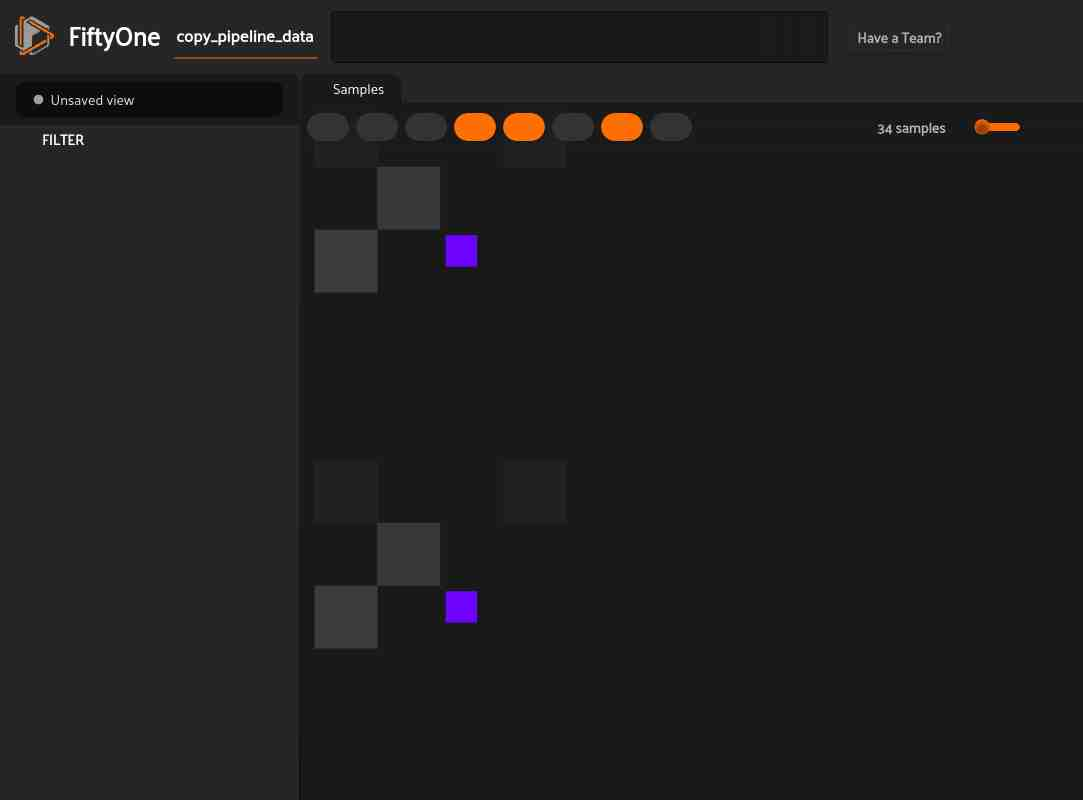

In [8]:
session.view = mistake_view


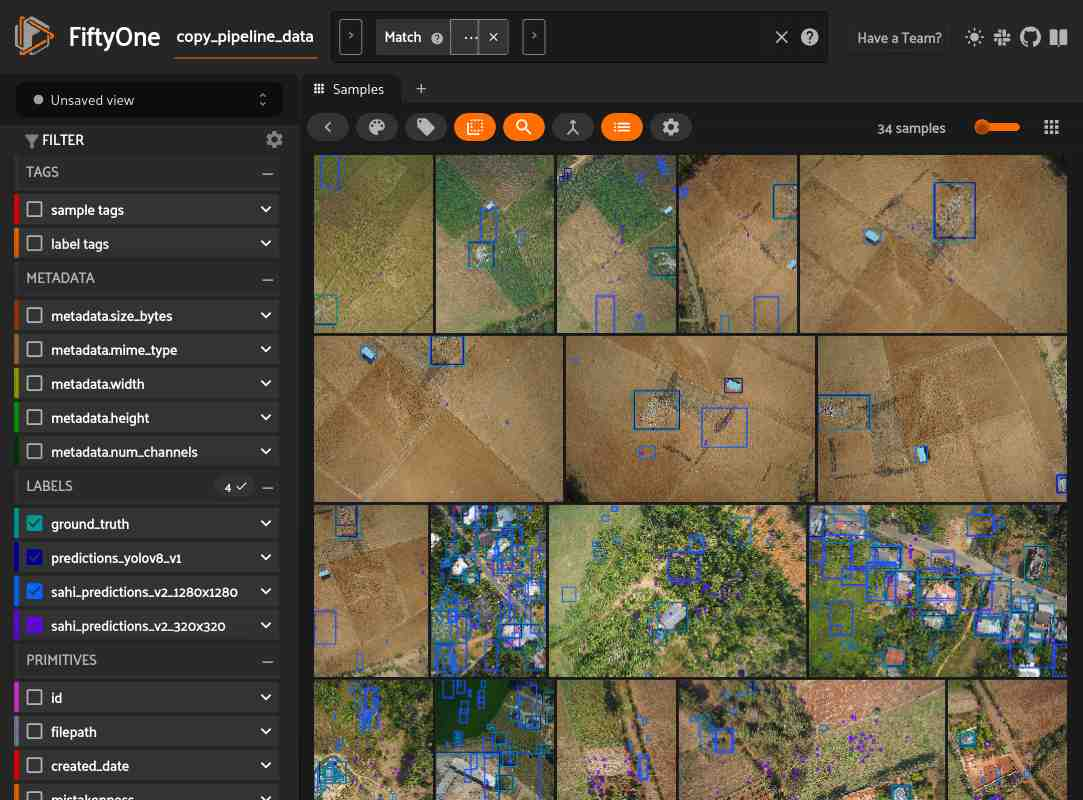

In [9]:
session.view = dataset.filter_labels("ground_truth", F("mistakenness_2") > 0.95)


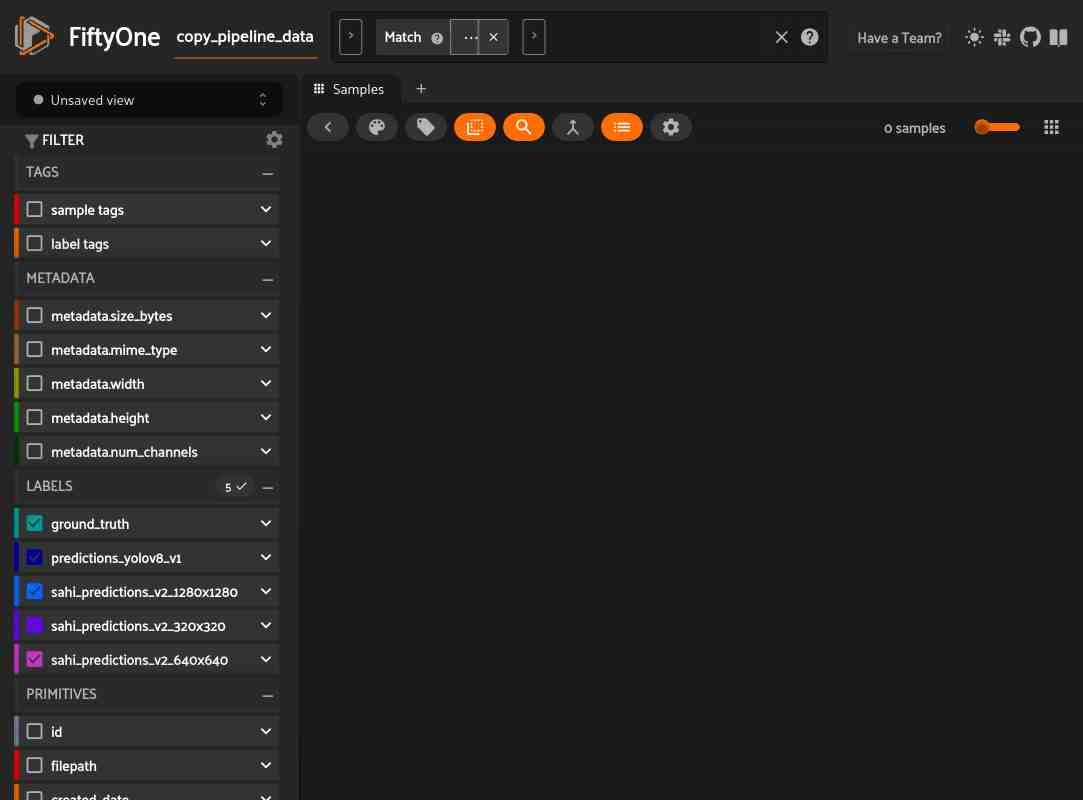

In [110]:
session.view = dataset.match(F("c_4_iou") > 0)


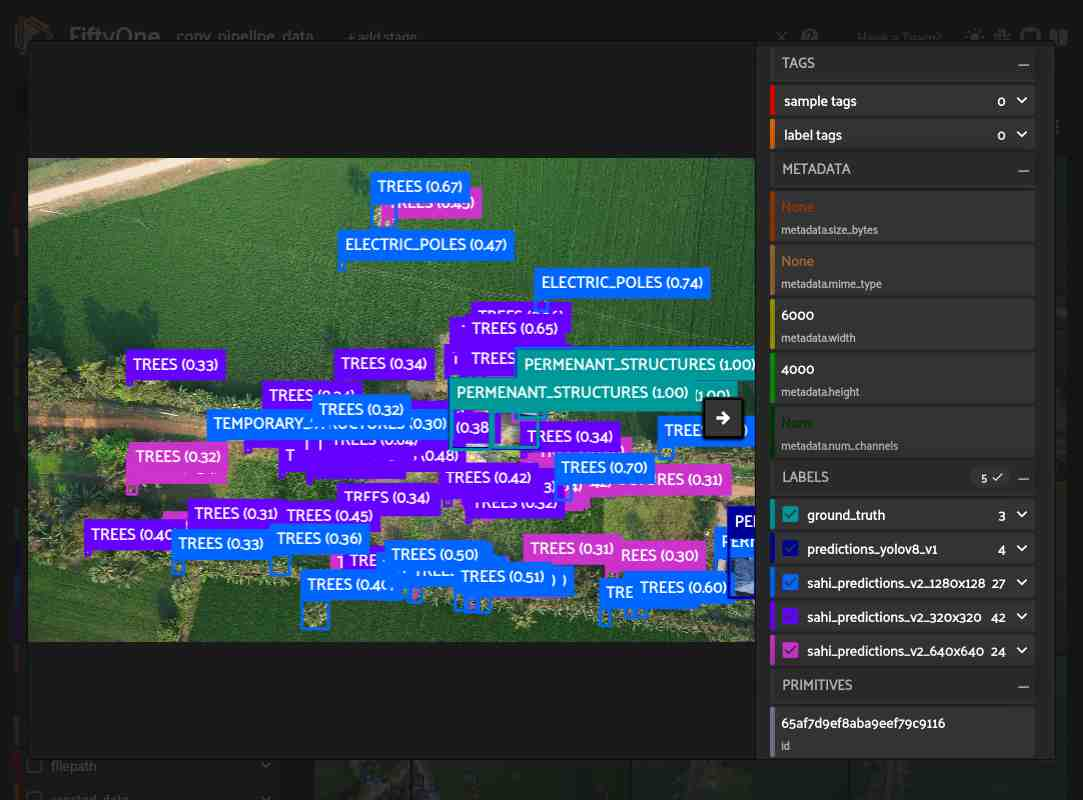

In [151]:
session = fo.launch_app(dataset)

In [114]:
expr = F("c_4_iou") > 0.75

In [115]:
print(expr)

{'$gt': ['$c_4_iou', 0.75]}


In [145]:
view = dataset.set_field(
    "sahi_predictions_v2_320x320.detections",
    F("detections").filter(F("c_4_iou") > 0.75)
)


In [152]:
view = dataset.match(F("sahi_predictions_v2_320x320.detections").filter(F("c_4_iou") > 0.9))

In [153]:
session.view = view

In [106]:
ground_truth = dataset.first().sahi_predictions_v2_1280x1280.detections
prediction = dataset.first().sahi_predictions_v2_320x320.detections
# iou = ground_truth.compute_ious(prediction)
iou = fo.utils.iou.compute_ious(ground_truth,prediction)

In [107]:
print(iou)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.98242865 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.00485071]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [108]:
print(ground_truth)

[<Detection: {
    'id': '65f9238206563c39c0e4ac2f',
    'attributes': {},
    'tags': [],
    'label': 'ELECTRIC_POLES',
    'bounding_box': [
        0.6974168294270834,
        0.2906889343261719,
        0.016537516276041667,
        0.025310760498046876,
    ],
    'mask': None,
    'confidence': 0.7423531413078308,
    'index': None,
    'compute_1': 'fp',
    'compute_1_id': '',
    'c_1': 'fp',
    'c_1_id': '',
    'c_3': 'fn',
    'c_3_id': '',
    'c_4': 'fp',
    'c_4_id': '',
    'possible_spurious_5': True,
}>, <Detection: {
    'id': '65f9238206563c39c0e4ac30',
    'attributes': {},
    'tags': [],
    'label': 'ELECTRIC_POLES',
    'bounding_box': [
        0.42772637939453123,
        0.2129609375,
        0.007037984212239583,
        0.020831787109375,
    ],
    'mask': None,
    'confidence': 0.4671231210231781,
    'index': None,
    'compute_1': 'fp',
    'compute_1_id': '',
    'c_1': 'fp',
    'c_1_id': '',
    'c_3': 'fn',
    'c_3_id': '',
    'c_4': 'fp',
  

In [113]:
print(prediction)

[<Detection: {
    'id': '65f96dec06563c39c0e705f4',
    'attributes': {},
    'tags': [],
    'label': 'TREES',
    'bounding_box': [
        0.6015223388671875,
        0.448,
        0.009531434377034504,
        0.011726305961608887,
    ],
    'mask': None,
    'confidence': 0.6776191592216492,
    'index': None,
    'compute_2': 'fp',
    'compute_2_id': '',
    'c_2': 'fp',
    'c_2_id': '',
    'c_3': 'fp',
    'c_3_id': '',
    'c_4': 'fn',
    'c_4_id': '',
    'possible_spurious_4': True,
}>, <Detection: {
    'id': '65f96dec06563c39c0e705f5',
    'attributes': {},
    'tags': [],
    'label': 'TREES',
    'bounding_box': [
        0.594863042195638,
        0.44555781173706055,
        0.005423019409179688,
        0.006978441715240478,
    ],
    'mask': None,
    'confidence': 0.6660374402999878,
    'index': None,
    'compute_2': 'fp',
    'compute_2_id': '',
    'c_2': 'fp',
    'c_2_id': '',
    'c_3': 'fp',
    'c_3_id': '',
    'c_4': 'fn',
    'c_4_id': '',
    'po

In [181]:
from fiftyone import ViewField as F

query_date = datetime(2023, 9, 19, 0, 0, 0)
view = dataset.match(F("created_date") < query_date)
session.view = view

NameError: name 'datetime' is not defined